<a href="https://colab.research.google.com/github/AlexisD29/Homework/blob/master/Project_Titanic_Part_2_AlexisDowning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1 - Titanic - Part 2 - Alexis Downing

The goal is to predict whether or not a passenger survived based on attributes such as their age, sex, passenger class, where they embarked and so on.

## 1) Upload this jupyter notebook page to your colab




## 2) Get the Shareable link for your page and update the URL below for your Jupyter Notebook:
- _Make sure you select __'Anyone with the Link'__ option_

__This jupyter notebook page is located at__: YOUR LINK HERE

We will click on the link above to visit to your Jupyter Notebook page.

## 3) Downloaded the data (train.csv and test.csv files) from Kaggle and then upload them using the first code block below. 
- To download the files, login to [Kaggle](https://www.kaggle.com/) and go to the [Titanic challenge](https://www.kaggle.com/c/titanic)


Keep the following code block as it is. Use it to upload the donwloaded csv files and to save them into your colab:

In [ ]:
from google.colab import files
import pandas as pd
import io
import os

train_data_dict = files.upload() #uploads as a disctionary and creates a file
os.remove('train.csv') #remove the file created during upload that is in the root folder
train_data = pd.read_csv(io.StringIO(train_data_dict['train.csv'].decode('utf-8')),sep=',') #get the data from the dictionary to the dataframe

test_data_dict = files.upload() #uploads as a disctionary and creates a file
os.remove('test.csv') #remove the file created during upload that is in the root folder
test_data = pd.read_csv(io.StringIO(test_data_dict['test.csv'].decode('utf-8')),sep=',') #get the data from the dictionary to the dataframe

titanic_dir_path = os.path.join("datasets", "titanic")
os.makedirs(titanic_dir_path, exist_ok=True) #create the folder
train_csv_path = os.path.join(titanic_dir_path, "train.csv") #create the path for the csv file 
test_csv_path = os.path.join(titanic_dir_path, "test.csv") #create the path for the csv file

train_data.to_csv(train_csv_path, index=False) #save the data to csv file
test_data.to_csv(test_csv_path, index=False) #save the data to csv file

Saving train.csv to train.csv


Saving test.csv to test.csv


Once you upload the data, they will be saved into the `datasets/titanic` directory. After uploading, you don't need to upload them again. You can start run your code starting the below code block.

In [ ]:
import pandas as pd
import os

titanic_dir_path = os.path.join("datasets", "titanic")
train_csv_path = os.path.join(titanic_dir_path, "train.csv") #create the path for the csv file 
test_csv_path = os.path.join(titanic_dir_path, "test.csv") #create the path for the csv file

train_data = pd.read_csv(train_csv_path)
test_data = pd.read_csv(test_csv_path)


## 4) Part 1 Solutions:

In [ ]:
all_data = train_data.append(test_data) # important
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [ ]:
all_data.reset_index(inplace = True, drop = True) # reset the inde inplace and drop the created extra 'index' column

In [ ]:
# Fill in missing age information based on the median age for its class and sex.
all_data['Age'] = all_data.groupby(['Pclass','Sex'])['Age'].apply(lambda x : x.fillna(x.median()))

all_data.Cabin = all_data.Cabin.fillna('NA')

# Create a new feature by adding SibSp, Parch and the person herself. 
all_data['Family_Size'] = all_data['SibSp'] + all_data['Parch'] + 1

In [ ]:
# Fill in missing Embarked based on the most frequent Embarked
all_data['Embarked'].fillna(all_data['Embarked'].mode()[0], inplace = True)

# Fill in missing fare based on its class and embarked place
all_data['Fare'] = all_data.groupby(['Pclass','Embarked'])['Fare'].apply(lambda x : x.fillna(x.median()))
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
 12  Family_Size  1309 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 133.1+ KB


In [ ]:
results_categorical = pd.qcut(all_data['Fare'],5)
all_data['Fare_Category'] = pd.Series(results_categorical).astype(str)
all_data['Fare_Category'].value_counts()

(-0.001, 7.854]      275
(21.558, 41.579]     265
(41.579, 512.329]    259
(7.854, 10.5]        255
(10.5, 21.558]       255
Name: Fare_Category, dtype: int64

In [ ]:
results_categorical = pd.cut(all_data['Age'].astype(int),5)
all_data['Age_Category'] = pd.Series(results_categorical).astype(str)
all_data['Age_Category'].value_counts()

(16.0, 32.0]     752
(32.0, 48.0]     304
(-0.08, 16.0]    134
(48.0, 64.0]     106
(64.0, 80.0]      13
Name: Age_Category, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
all_data['Sex_Numeric'] = LabelEncoder().fit_transform(all_data['Sex'])
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    1309 non-null   int64  
 1   Survived       891 non-null    float64
 2   Pclass         1309 non-null   int64  
 3   Name           1309 non-null   object 
 4   Sex            1309 non-null   object 
 5   Age            1309 non-null   float64
 6   SibSp          1309 non-null   int64  
 7   Parch          1309 non-null   int64  
 8   Ticket         1309 non-null   object 
 9   Fare           1309 non-null   float64
 10  Cabin          1309 non-null   object 
 11  Embarked       1309 non-null   object 
 12  Family_Size    1309 non-null   int64  
 13  Fare_Category  1309 non-null   object 
 14  Age_Category   1309 non-null   object 
 15  Sex_Numeric    1309 non-null   int64  
dtypes: float64(3), int64(6), object(7)
memory usage: 163.8+ KB


In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

def encode_category_to_numeric(feature,data_frame):
  encoded_feat = OneHotEncoder().fit_transform(data_frame[feature].values.reshape(-1,1)).toarray()
  #number_unique = data_frame[feature].nunique()
  unique_values = data_frame[feature].unique()
  sorted_unique_value = np.sort(unique_values)
  cols = ['{}_{}'.format(feature,value) for value in sorted_unique_value]
  encoded_data = pd.DataFrame(encoded_feat, columns=cols)
  return encoded_data


In [ ]:
encoded_data = encode_category_to_numeric('Embarked',all_data)
all_data = pd.concat([all_data, encoded_data], axis=1)

In [ ]:
encoded_data = encode_category_to_numeric('Fare_Category',all_data)
all_data = pd.concat([all_data, encoded_data], axis=1)

In [ ]:
encoded_data = encode_category_to_numeric('Age_Category',all_data)
all_data = pd.concat([all_data, encoded_data], axis=1)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PassengerId                      1309 non-null   int64  
 1   Survived                         891 non-null    float64
 2   Pclass                           1309 non-null   int64  
 3   Name                             1309 non-null   object 
 4   Sex                              1309 non-null   object 
 5   Age                              1309 non-null   float64
 6   SibSp                            1309 non-null   int64  
 7   Parch                            1309 non-null   int64  
 8   Ticket                           1309 non-null   object 
 9   Fare                             1309 non-null   float64
 10  Cabin                            1309 non-null   object 
 11  Embarked                         1309 non-null   object 
 12  Family_Size         

In [ ]:
corr_matrix = all_data.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived                           1.000000
Fare_Category_(41.579, 512.329]    0.263007
Fare                               0.257307
Embarked_C                         0.168240
Age_Category_(-0.08, 16.0]         0.121485
Parch                              0.081629
Fare_Category_(21.558, 41.579]     0.062529
Fare_Category_(10.5, 21.558]       0.043153
Age_Category_(32.0, 48.0]          0.032801
Age_Category_(48.0, 64.0]          0.030350
Family_Size                        0.016639
Embarked_Q                         0.003650
PassengerId                       -0.005007
SibSp                             -0.035322
Age                               -0.058635
Age_Category_(64.0, 80.0]         -0.067344
Age_Category_(16.0, 32.0]         -0.106821
Embarked_S                        -0.149683
Fare_Category_(-0.001, 7.854]     -0.171109
Fare_Category_(7.854, 10.5]       -0.191707
Pclass                            -0.338481
Sex_Numeric                       -0.543351
Name: Survived, dtype: float64

## 5)  Part 2 Questions:

### 5) a) More feature engineering: Similar to what you have done for 'Age', 'Fare' and 'Embarked', use one hot encoder to prepare new features for Pclass.

In [ ]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing Pclass column (label encoded values of Pclass)
encoded_feat = OneHotEncoder().fit_transform(all_data['Pclass'].values.reshape(-1,1)).toarray()
print(encoded_feat)

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


### 5) b) Convert 'Sex_Numeric' and 'Family_Size' fields to 'float16' and then calculate  correlations matrix.

In [ ]:
Converted_Sex_Numeric = all_data['Sex_Numeric'].astype('float16')
#Converted_Sex_Numeric for the the correlation matrix will be represented by the variable corrM_CSN

Converted_Family_Size = all_data['Family_Size'].astype('float16')
#Converted_Family_Sizefor the the correlation matrix will be represented by the variable corrM_CFS


all_data = pd.concat([all_data, Converted_Sex_Numeric], axis=1)
all_data = pd.concat([all_data, Converted_Family_Size], axis=1)

Correlation_Matrix = all_data.corr()
print(Correlation_Matrix)

                                 PassengerId  ...  Family_Size
PassengerId                         1.000000  ...    -0.031437
Survived                           -0.005007  ...     0.016639
Pclass                             -0.038354  ...     0.050027
Age                                 0.020478  ...    -0.207570
SibSp                              -0.055224  ...     0.861952
Parch                               0.008942  ...     0.792296
Fare                                0.031029  ...     0.226653
Family_Size                        -0.031437  ...     1.000000
Sex_Numeric                         0.013406  ...    -0.188583
Embarked_C                          0.048101  ...    -0.036553
Embarked_Q                          0.011585  ...    -0.087190
Embarked_S                         -0.049836  ...     0.087771
Fare_Category_(-0.001, 7.854]       0.048268  ...    -0.252406
Fare_Category_(10.5, 21.558]       -0.001128  ...     0.009273
Fare_Category_(21.558, 41.579]     -0.014435  ...     0

In [ ]:
all_data.corr() < 0.05 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size,Sex_Numeric,Embarked_C,Embarked_Q,Embarked_S,"Fare_Category_(-0.001, 7.854]","Fare_Category_(10.5, 21.558]","Fare_Category_(21.558, 41.579]","Fare_Category_(41.579, 512.329]","Fare_Category_(7.854, 10.5]","Age_Category_(-0.08, 16.0]","Age_Category_(16.0, 32.0]","Age_Category_(32.0, 48.0]","Age_Category_(48.0, 64.0]","Age_Category_(64.0, 80.0]",Sex_Numeric,Family_Size
PassengerId,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
Survived,True,False,True,True,True,False,False,True,True,False,True,True,True,True,False,False,True,False,True,True,True,True,True,True
Pclass,True,True,False,True,False,True,True,False,False,True,False,False,False,False,True,True,False,False,False,True,True,True,False,False
Age,True,True,True,False,True,True,False,True,False,False,True,True,True,True,False,False,True,True,True,False,False,False,False,True
SibSp,True,True,False,True,False,False,False,False,True,True,True,False,True,True,False,False,True,False,True,True,True,True,True,False
Parch,True,False,True,True,False,False,False,False,True,True,True,False,True,True,False,False,True,False,True,True,True,True,True,False
Fare,True,False,True,False,False,False,False,False,True,False,True,True,True,True,True,False,True,True,True,False,False,True,True,False
Family_Size,True,True,False,True,False,False,False,False,True,True,True,False,True,True,False,False,True,False,True,True,True,True,True,False
Sex_Numeric,True,True,False,False,True,True,True,True,False,True,True,False,False,True,True,True,False,True,True,True,True,False,False,True
Embarked_C,True,False,True,False,True,True,False,True,True,False,True,True,True,True,True,False,True,True,True,True,False,True,True,True


In [ ]:
unimportant = (Correlation_Matrix < 0.05)
print(unimportant)

                                 PassengerId  ...  Family_Size
PassengerId                            False  ...         True
Survived                                True  ...         True
Pclass                                  True  ...        False
Age                                     True  ...         True
SibSp                                   True  ...        False
Parch                                   True  ...        False
Fare                                    True  ...        False
Family_Size                             True  ...        False
Sex_Numeric                             True  ...         True
Embarked_C                              True  ...         True
Embarked_Q                              True  ...         True
Embarked_S                              True  ...        False
Fare_Category_(-0.001, 7.854]           True  ...         True
Fare_Category_(10.5, 21.558]            True  ...         True
Fare_Category_(21.558, 41.579]          True  ...      

### 5) c) Based on the correlation matrix results, identify some of the features as unimportant and drop them and assign the remaining DataFrame to the variable named 'important_data'. When you drop features, leave at least 10 columns besides 'Survivided' in the 'important_data' DataFrame. After that, check the correlation to 'Survived' as you did before.

In [ ]:
all_data.drop(columns=['SibSp','Parch', 'Embarked'], inplace=True)
important_data = all_data 


In [ ]:
important_data

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Family_Size,Fare_Category,Age_Category,Sex_Numeric,Embarked_C,Embarked_Q,Embarked_S,"Fare_Category_(-0.001, 7.854]","Fare_Category_(10.5, 21.558]","Fare_Category_(21.558, 41.579]","Fare_Category_(41.579, 512.329]","Fare_Category_(7.854, 10.5]","Age_Category_(-0.08, 16.0]","Age_Category_(16.0, 32.0]","Age_Category_(32.0, 48.0]","Age_Category_(48.0, 64.0]","Age_Category_(64.0, 80.0]",Sex_Numeric,Family_Size
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NA,2,"(-0.001, 7.854]","(16.0, 32.0]",1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,2,"(41.579, 512.329]","(32.0, 48.0]",0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NA,1,"(7.854, 10.5]","(16.0, 32.0]",0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,2,"(41.579, 512.329]","(32.0, 48.0]",0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NA,1,"(7.854, 10.5]","(32.0, 48.0]",1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,25.0,A.5. 3236,8.0500,NA,1,"(7.854, 10.5]","(16.0, 32.0]",1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,PC 17758,108.9000,C105,1,"(41.579, 512.329]","(32.0, 48.0]",0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,SOTON/O.Q. 3101262,7.2500,NA,1,"(-0.001, 7.854]","(32.0, 48.0]",1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1307,1308,NaN,3,"Ware, Mr. Frederick",male,25.0,359309,8.0500,NA,1,"(7.854, 10.5]","(16.0, 32.0]",1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [ ]:
corr_important_matrix = important_data.corr()
corr_important_matrix["Survived"].sort_values(ascending=False)

Survived                           1.000000
Fare_Category_(41.579, 512.329]    0.263007
Fare                               0.257307
Embarked_C                         0.168240
Age_Category_(-0.08, 16.0]         0.121485
Fare_Category_(21.558, 41.579]     0.062529
Fare_Category_(10.5, 21.558]       0.043153
Age_Category_(32.0, 48.0]          0.032801
Age_Category_(48.0, 64.0]          0.030350
Family_Size                        0.016639
Family_Size                        0.016639
Embarked_Q                         0.003650
PassengerId                       -0.005007
Age                               -0.058635
Age_Category_(64.0, 80.0]         -0.067344
Age_Category_(16.0, 32.0]         -0.106821
Embarked_S                        -0.149683
Fare_Category_(-0.001, 7.854]     -0.171109
Fare_Category_(7.854, 10.5]       -0.191707
Pclass                            -0.338481
Sex_Numeric                       -0.543351
Sex_Numeric                       -0.543351
Name: Survived, dtype: float64

### 5) d) Create X_train, Y_train and X_test DataFrames. Note that X_train should 891 instances and the rest should go to X_test. Drop the 'Survived' from X_test. Check the X_train, X_test and Y_train.

In [ ]:
X_train = all_data[0:891]
X_test = all_data[891:1309]

Updated_X_train = X_train.drop('Survived', axis =1)
Y_train = X_train['Survived']

In [ ]:
Updated_X_train

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Family_Size,Fare_Category,Age_Category,Sex_Numeric,Embarked_C,Embarked_Q,Embarked_S,"Fare_Category_(-0.001, 7.854]","Fare_Category_(10.5, 21.558]","Fare_Category_(21.558, 41.579]","Fare_Category_(41.579, 512.329]","Fare_Category_(7.854, 10.5]","Age_Category_(-0.08, 16.0]","Age_Category_(16.0, 32.0]","Age_Category_(32.0, 48.0]","Age_Category_(48.0, 64.0]","Age_Category_(64.0, 80.0]",Sex_Numeric,Family_Size
0,1,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NA,2,"(-0.001, 7.854]","(16.0, 32.0]",1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,2,"(41.579, 512.329]","(32.0, 48.0]",0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NA,1,"(7.854, 10.5]","(16.0, 32.0]",0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,2,"(41.579, 512.329]","(32.0, 48.0]",0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
4,5,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NA,1,"(7.854, 10.5]","(32.0, 48.0]",1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,211536,13.0000,NA,1,"(10.5, 21.558]","(16.0, 32.0]",1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,112053,30.0000,B42,1,"(21.558, 41.579]","(16.0, 32.0]",0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.0,W./C. 6607,23.4500,NA,4,"(21.558, 41.579]","(16.0, 32.0]",0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,111369,30.0000,C148,1,"(21.558, 41.579]","(16.0, 32.0]",1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [ ]:
X_test

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Family_Size,Fare_Category,Age_Category,Sex_Numeric,Embarked_C,Embarked_Q,Embarked_S,"Fare_Category_(-0.001, 7.854]","Fare_Category_(10.5, 21.558]","Fare_Category_(21.558, 41.579]","Fare_Category_(41.579, 512.329]","Fare_Category_(7.854, 10.5]","Age_Category_(-0.08, 16.0]","Age_Category_(16.0, 32.0]","Age_Category_(32.0, 48.0]","Age_Category_(48.0, 64.0]","Age_Category_(64.0, 80.0]",Sex_Numeric,Family_Size
891,892,NaN,3,"Kelly, Mr. James",male,34.5,330911,7.8292,NA,1,"(-0.001, 7.854]","(32.0, 48.0]",1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
892,893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,363272,7.0000,NA,2,"(-0.001, 7.854]","(32.0, 48.0]",0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
893,894,NaN,2,"Myles, Mr. Thomas Francis",male,62.0,240276,9.6875,NA,1,"(7.854, 10.5]","(48.0, 64.0]",1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
894,895,NaN,3,"Wirz, Mr. Albert",male,27.0,315154,8.6625,NA,1,"(7.854, 10.5]","(16.0, 32.0]",1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
895,896,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,3101298,12.2875,NA,3,"(10.5, 21.558]","(16.0, 32.0]",0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,25.0,A.5. 3236,8.0500,NA,1,"(7.854, 10.5]","(16.0, 32.0]",1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,PC 17758,108.9000,C105,1,"(41.579, 512.329]","(32.0, 48.0]",0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,SOTON/O.Q. 3101262,7.2500,NA,1,"(-0.001, 7.854]","(32.0, 48.0]",1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1307,1308,NaN,3,"Ware, Mr. Frederick",male,25.0,359309,8.0500,NA,1,"(7.854, 10.5]","(16.0, 32.0]",1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [ ]:
Y_train

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

### 5) e) Use StandardScaler of Scikit Learn to scale the 'Fare' feature of both X_train and X_test. 

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Fare_train = np.array((X_train['Fare']))
Fare_test = np.array((X_test['Fare']))

Update_X_train = Fare_train.reshape(1,-1)
Update_X_test = Fare_test.reshape(1,-1)

print(scaler.fit(Fare_train))
print(scaler.fit(Fare_test))

ValueError: ignored

### 5) f) For each of the algorithms, use Scikit-Learn's cross-validation feature to measure the performance and print out mean and std for each algoritm:

1. Stochastic Gradient Descent (SGD)
2. LogisticRegression
3. Support Vector Machine (kernel='linear' parameter)
4. Support Vector Machine (kernel = 'rbf' parameter)
5. DecisionTreeClassifier
6. RandomForestClassifier
7. ExtraTreesClassifier
8. AdaBoostClassifier
9. GradientBoostingClassifier
10. XGBoost
-- You can import XGBoost library as follows:  "from xgboost import XGBClassifier"

Parameters:
- Set the scoring parameter of cross-validation to 'f1'
- Use the default cv = 5 parameter of cross-validation
- Use random_state = 42 for initializing model algorithms
- Use the kernel parameter indicated above for SVM algorithms
- For others, use the default parameters (no need to specify explicitly)



In [ ]:
#Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode Name attribute. 
Updated_X_train['Name']= label_encoder.fit_transform(Updated_X_train['Name']) 
  
Updated_X_train['Name'].unique() 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([108, 190, 353, 272,  15, 554, 515, 624, 412, 576, 727,  95, 729,
        28, 840, 359, 682, 867, 839, 512, 273,  80, 523, 765, 626,  44,
       240, 260, 605, 813, 828, 776, 289, 856, 535, 372, 505, 134, 837,
       589,   7, 827, 446, 456, 212, 697, 473, 604, 726,  38, 629, 594,
       333, 246, 620, 873, 707, 595, 853, 299, 749, 385, 337, 755, 784,
       560, 596, 185,  25, 440, 396, 300, 376, 161,  87, 546, 778, 563,
       127, 223, 842, 737, 519, 141, 386,  52, 255, 764, 259, 149, 159,
        31, 150, 209, 184, 740, 292, 308, 219, 422, 656, 658, 858, 405,
       312, 542, 724, 559, 675, 552, 667, 882,  67, 417,  46, 645, 178,
       826,  70,  24, 362, 551, 575, 848, 857, 588, 525, 499, 653, 234,
       225, 165, 695, 851, 772, 685, 585, 271, 618, 282,  99, 597, 319,
       116,  32, 586,  29, 254, 580, 121,  68, 643, 532, 889, 612, 866,
       287, 181, 767, 716, 186, 847,  82, 129, 628, 293, 157, 760,  69,
       486, 832, 680, 408, 752, 769, 444, 464, 388, 320, 474, 71

In [ ]:
#Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode Sex attribute. 
Updated_X_train['Sex']= label_encoder.fit_transform(Updated_X_train['Sex']) 
  
Updated_X_train['Sex'].unique()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([1, 0])

In [ ]:
#Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode Ticket attribute. 
Updated_X_train['Ticket']= label_encoder.fit_transform(Updated_X_train['Ticket']) 
  
Updated_X_train['Ticket'].unique() 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([523, 596, 669,  49, 472, 275,  85, 395, 344, 132, 616,  38, 535,
       333, 413, 153, 480, 151, 301, 184, 139, 152, 278,  42, 329, 179,
        95, 283, 362, 598, 586, 288, 549, 600,  43, 202, 514, 302, 186,
       507,  53, 391, 634, 282, 617, 462,  76, 190, 377, 249, 522, 587,
       239,  29,  94, 555, 215, 561, 566, 197,  32, 457, 337, 601, 189,
       553, 623, 248, 270, 557, 621, 204,  80, 347, 355, 473, 158, 432,
       304, 311, 280,  25, 637, 247, 676, 652, 297, 298, 341, 678, 548,
       428, 475, 607, 612, 117, 150, 384, 361, 417, 505, 245, 354, 296,
       254, 388, 469,   2, 193, 274, 491, 176, 666, 460, 585, 540, 219,
       463, 541, 196, 318, 380, 640, 537, 111, 552, 630,  55, 504, 592,
       203, 332, 668, 438, 118, 558, 405, 113, 147, 622,  36, 516, 538,
       573, 595, 418, 654, 258, 568, 470, 559, 323, 265, 423,  28, 576,
         5, 659,  90, 412, 488, 593, 169, 574, 629, 114, 271,  34, 459,
        11, 435, 386, 122, 227, 406, 604, 452, 494, 461, 160, 30

In [ ]:
#Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode Cabin attribute. 
Updated_X_train['Cabin']= label_encoder.fit_transform(Updated_X_train['Cabin']) 
  
Updated_X_train['Cabin'].unique() 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([146,  81,  55, 129, 145,  49, 111,  13,  63,  41, 101,  23,  71,
        21,  80, 142, 140, 122,  12,  91,  98,  52,  36, 116, 138, 107,
        45, 141,  61, 123,  18,  14,  69, 144,   9,  28,  43,   8, 103,
        93,  87,  78, 102,  83,  40, 134,  46,  57,  89,  54, 113,   3,
        31,  90,  62,  51,  74, 125,  72,  35,  76, 124,  65,  17,  56,
        85, 127, 147,  59, 104,  24, 131,  79,  47, 115, 128,  10,  50,
        53,  86, 126,  97, 117, 133,   1,  25,  64,  96,  42, 121, 106,
        39,  88,  26,  27,  20,  82,  77,   2,  48,  75,   0, 135,  29,
         4,  95, 110, 114,   5,  33,   7, 108, 132,  58,  38,  34, 109,
        32,  19, 139,  73, 120,  84,  66, 137,  15, 105,  67, 100, 118,
        92, 136, 143,  22, 112,  44,  94,  11,  16,  37, 130,  68,  99,
       119,   6,  70,  30,  60])

In [ ]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode Fare_Category attribute. 
Updated_X_train['Fare_Category']= label_encoder.fit_transform(Updated_X_train['Fare_Category']) 
  
Updated_X_train['Fare_Category'].unique() 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


array([0, 3, 4, 1, 2])

In [ ]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode Age_category attribute. 
Updated_X_train['Age_Category']= label_encoder.fit_transform(Updated_X_train['Age_Category']) 
  
Updated_X_train['Age_Category'].unique() 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


array([1, 2, 3, 0, 4])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')

encoded_feat = OneHotEncoder().fit_transform(Updated_X_train['Ticket'].values.reshape(-1,1)).toarray()
print(encoded_feat)
feat = pd.DataFrame(encoded_feat)
feat2 = feat.drop(feat.iloc[:, 27:], inplace=True, axis=1)
Updated_X_train = Updated_X_train.append(feat2)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')

encoded_feat = OneHotEncoder().fit_transform(Updated_X_train['Cabin'].values.reshape(-1,1)).toarray()
print(encoded_feat)
feat = pd.DataFrame(encoded_feat)
feat3 = feat.drop(feat.iloc[:, 27:], inplace=True, axis=1)
Updated_X_train = Updated_X_train.append(feat3)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [ ]:
from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')

encoded_feat = OneHotEncoder().fit_transform(Updated_X_train['Fare_Category'].values.reshape(-1,1)).toarray()
print(encoded_feat)
feat = pd.DataFrame(encoded_feat)
feat4 = feat.drop(feat.iloc[:, 27:], inplace=True, axis=1)
Updated_X_train = Updated_X_train.append(feat4)

[[1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [ ]:
from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')

encoded_feat = OneHotEncoder().fit_transform(Updated_X_train['Sex'].values.reshape(-1,1)).toarray()
print(encoded_feat)
feat = pd.DataFrame(encoded_feat)
feat6 = feat.drop(feat.iloc[:, 27:], inplace=True, axis=1)
Updated_X_train = Updated_X_train.append(feat6)

[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [ ]:
from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')

encoded_feat = OneHotEncoder().fit_transform(Updated_X_train['Age_Category'].values.reshape(-1,1)).toarray()
print(encoded_feat)
feat = pd.DataFrame(encoded_feat)
feat5 = feat.drop(feat.iloc[:, 27:], inplace=True, axis=1)
Updated_X_train = Updated_X_train.append(feat5)

[[0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


1. Stochastic Gradient Descent (SGD)


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

clf = make_pipeline(StandardScaler(),
                   SGDClassifier(random_state =42))
clf.fit(Updated_X_train, Y_train)

SGDClassifier()
scores = cross_val_score(clf, Updated_X_train, Y_train, scoring = 'f1', cv=5)

print('Performance scores:', scores.round(3))
print("Mean value of SGD:", round(scores.mean(),3))
print("Standard deviation value of SGD:", round(scores.std(),3))

Performance scores: [0.709 0.593 0.677 0.652 0.615]
Mean value of SGD: 0.649
Standard deviation value of SGD: 0.042


2. LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
clf = LogisticRegression(random_state=42,max_iter=10000).fit(Updated_X_train, Y_train)
LogisticRegression()
scores = cross_val_score(clf, Updated_X_train, Y_train, scoring = 'f1', cv=5)

print('Performance scores:', scores.round(3))
print("Mean value of Logistic Regression:", round(scores.mean(),3))
print("Standard deviation value of Logistic Regression:", round(scores.std(),3))

Performance scores: [0.692 0.756 0.692 0.678 0.739]
Mean value of Logistic Regression: 0.711
Standard deviation value of Logistic Regression: 0.03


3.Support Vector Machine (kernel='linear' parameter)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(kernel ='linear',random_state=42))
clf.fit(Updated_X_train,Y_train)
SVC()
scores = cross_val_score(clf, Updated_X_train, Y_train, scoring = 'f1', cv=5)

print('Performance scores:', scores.round(3))
print("Mean value of SVM:", round(scores.mean(),3))
print("Standard deviation value of SVM:", round(scores.std(),3))

Performance scores: [0.726 0.742 0.712 0.645 0.708]
Mean value of SVM: 0.707
Standard deviation value of SVM: 0.033


4.Support Vector Machine (kernel='rbf' parameter)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
#No need to assign kernel to 'rbf'. It is that by default.
clf = make_pipeline(StandardScaler(), SVC(random_state=42))
clf.fit(Updated_X_train,Y_train)
SVC()
scores = cross_val_score(clf, Updated_X_train, Y_train, scoring = 'f1', cv=5)

print('Performance scores:', scores.round(3))
print("Mean value of SVM:", round(scores.mean(),3))
print("Standard deviation value of SVM:", round(scores.std(),3))

Performance scores: [0.754 0.763 0.742 0.701 0.785]
Mean value of SVM: 0.749
Standard deviation value of SVM: 0.028


5.DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier(random_state=42)
clf.fit(Updated_X_train, Y_train)
DecisionTreeClassifier()
scores = cross_val_score(clf, Updated_X_train, Y_train, scoring = 'f1', cv=5)

print('Performance scores:', scores.round(3))
print("Mean value of DecisionTreeClassifier:", round(scores.mean(),3))
print("Standard deviation value of DecisionTreeClassifier:", round(scores.std(),3))

Performance scores: [0.213 0.707 0.727 0.651 0.789]
Mean value of DecisionTreeClassifier: 0.617
Standard deviation value of DecisionTreeClassifier: 0.207


6.RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(random_state=42)
clf.fit(Updated_X_train, Y_train)
RandomForestClassifier()
scores = cross_val_score(clf, Updated_X_train, Y_train, scoring = 'f1', cv=5)

print('Performance scores:', scores.round(3))
print("Mean value of Classifier:", round(scores.mean(),3))
print("Standard deviation value of RandomForestClassifier:", round(scores.std(), 3))

Performance scores: [0.736 0.752 0.8   0.732 0.8  ]
Mean value of Classifier: 0.764
Standard deviation value of RandomForestClassifier: 0.03


7. ExtraTreesClassifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score

clf = ExtraTreesClassifier(random_state=42)
clf.fit(Updated_X_train, Y_train)
ExtraTreesClassifier()
scores = cross_val_score(clf, Updated_X_train, Y_train , scoring = 'f1', cv=5)

print('Performance scores:', scores.round(3))
print("Mean value of ExtraTreesClassifier:", round(scores.mean(),3))
print("Standard deviation value of ExtraTreesClassifier:", round(scores.std(), 3))

Performance scores: [0.748 0.721 0.763 0.712 0.789]
Mean value of ExtraTreesClassifier: 0.747
Standard deviation value of ExtraTreesClassifier: 0.028


8.AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

clf = AdaBoostClassifier(random_state=42)
clf.fit(Updated_X_train, Y_train)
AdaBoostClassifier()
scores = cross_val_score(clf, Updated_X_train, Y_train , scoring = 'f1', cv=5)

print('Performance scores:', scores.round(3))
print("Mean value of AdaBoostClassifier:", round(scores.mean(),3))
print("Standard deviation value of AdaBoostClassifier:", round(scores.std(), 3))

Performance scores: [0.    0.745 0.752 0.726 0.   ]
Mean value of AdaBoostClassifier: 0.444
Standard deviation value of AdaBoostClassifier: 0.363


9. GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
clf = GradientBoostingClassifier(random_state=42)
clf.fit(Updated_X_train, Y_train)
GradientBoostingClassifier()
scores = cross_val_score(clf, Updated_X_train, Y_train , scoring = 'f1', cv=5)

print('Performance scores:', scores.round(3))
print("Mean value of GradientBoostingClassifier:", round(scores.mean(),3))
print("Standard deviation value of GradientBoostingClassifier:", round(scores.std(), 3))

Performance scores: [0.029 0.754 0.818 0.744 0.756]
Mean value of GradientBoostingClassifier: 0.62
Standard deviation value of GradientBoostingClassifier: 0.297


10. XGBClassifier

In [ ]:

import numpy as np
from xgboost import XGBClassifier
Updated_X_train = np.array(Updated_X_train)
Y_train= np.array(Y_train)
clf = XGBClassifier()
clf.fit(Updated_X_train,Y_train.ravel())

scores = cross_val_score(clf, Updated_X_train, Y_train , scoring = 'f1', cv=5)
print('Performance scores:', scores.round(3))
print("Mean value of XGBClassifier:", round(scores.mean(),3))
print("Standard deviation value of XGBClassifier:", round(scores.std(), 3))

Performance scores: [0.029 0.766 0.803 0.702 0.794]
Mean value of XGBClassifier: 0.619
Standard deviation value of XGBClassifier: 0.297


### 5) g) Select the top 3 best performing classifiers. List them along with their mean and std scores. For these top 3 best performing classifiers, find the best hyperparameters using GridSearchCV. 

- Use estimator.get_params().keys() or the API description of the classifiers to find out which hyperparameters you can use. 
- Use the same scoring parameter ('f1') and use cv = 10 this time. 
- Print out the best_estimator_ and best_score_ results of your Grid Search
- Use the following hyparparameter options if they fit for your top 3 classifiers:

n_estimators = [300, 400, 500]

learning_rate = [0.3, 0.1, 0.05]

max_features =  [1, 0.5, 0.3]

subsample = [1, 0.5, 0.3]

max_samples = [1, 0.5, 0.3]

bootstrap = [True,False]





Top 1: RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


RFC = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators': [300,400,500],
    'max_features': [1,0.5,0.3], 'max_samples':[1,0.5,0.3], 'bootstrap':[True,False]}
clf = GridSearchCV(RFC, param_grid, scoring='f1',cv=10,)
clf.fit(Updated_X_train, Y_train)

RFC_best = clf.best_estimator_
scores = cross_val_score(RFC, Updated_X_train, Y_train)
scores_mean = round(scores.mean(),3)
scores_std = round(scores.std(),3)
print('Best_estimator:', RFC_best)
print('Best_score_results:', round(clf.best_score_,3))
print('Mean value:', scores_mean)
print('Standard Deviation:',scores_std)

Best_estimator: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=0.3,
                       max_leaf_nodes=None, max_samples=0.5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
Best_score_results: 0.785
Mean value: 0.833
Standard Deviation: 0.016


Top 2: Support Vector Machine Classification

In [ ]:
import sklearn
svc = sklearn.svm.SVC()
from sklearn.model_selection import GridSearchCV
#No need to assign kernel to 'rbf'. It is that by default.
clfsvm = make_pipeline(StandardScaler(), SVC(random_state=42))

param_grid = { }
clfsvm = GridSearchCV(clfsvm,param_grid, scoring='f1',cv=10,)
clfsvm.fit(Updated_X_train, Y_train)

SVM_best = clfsvm.best_estimator_

scores = cross_val_score(clfsvm, Updated_X_train, Y_train)
scores_mean = round(scores.mean(),3)
scores_std = round(scores.std(),3)
print('Best_estimator:', SVM_best)
print('Best_score_results:', round(clfsvm.best_score_,3))
print('Mean value:', scores_mean)
print('Standard Deviation:',scores_std)



Best_estimator: Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=42, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)
Best_score_results: 0.749
Mean value: 0.749
Standard Deviation: 0.028


Top 3: ExtraTreesClassifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

etc = ExtraTreesClassifier(random_state=42)
param_grid = {'n_estimators': [300,400,500],
    'max_features': [1,0.5,0.3], 'max_samples':[1,0.5,0.3], 'bootstrap':[True,False]}
etc = GridSearchCV(etc, param_grid, scoring='f1',cv=10,)
etc.fit(Updated_X_train, Y_train)

scores = cross_val_score(etc, Updated_X_train, Y_train)

ETC_best = etc.best_estimator_
scores_mean = scores.mean()
scores_std = scores.std()
print('Best_estimator:', etc.best_estimator_)
print('Best_score_results:', etc.best_score_)
print('Mean value:', scores_mean)
print('Standard Deviation:',scores_std)

### 5) h) For the top 3 best performing classifiers, plot the learning curve chart. You can benefit from the following page for the plot:

Kaggl Titanic: A Machine Learning from Disaster | Modelling Part 2: 
https://www.codementor.io/@innat_2k14/kaggl-titanic-a-machine-learning-from-disaster-modelling-part-2-10gfjtm0p3


RandomForestClassifier 

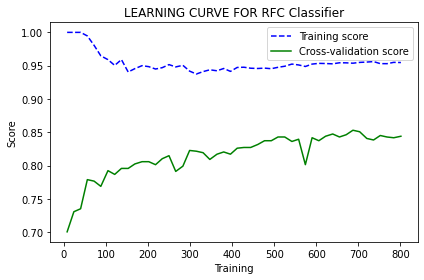

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import load_digits 
from sklearn.model_selection import learning_curve 

 

# Obtain scores from learning curve function 
# cv is the number of folds while performing Cross Validation 
sizes, training_scores, testing_scores = learning_curve(clf.best_estimator_, Updated_X_train, Y_train, cv=10, train_sizes=np.linspace(0.01, 1.0, 50)) 

# Mean and Standard Deviation of training scores 
mean_training = np.mean(training_scores, axis=1) 
Standard_Deviation_training = np.std(training_scores, axis=1) 

# Mean and Standard Deviation of testing scores 
mean_testing = np.mean(testing_scores, axis=1) 
Standard_Deviation_testing = np.std(testing_scores, axis=1) 

# dotted blue line is for training scores and green line is for cross-validation score 
plt.plot(sizes, mean_training, '--', color="b", label="Training score") 
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score") 

# Drawing plot 
plt.title("LEARNING CURVE FOR RFC Classifier") 
plt.xlabel("Training"), plt.ylabel("Score"), plt.legend(loc="best") 
plt.tight_layout() 
plt.show()


Support Vector Machine (kernel='rbf' parameter)

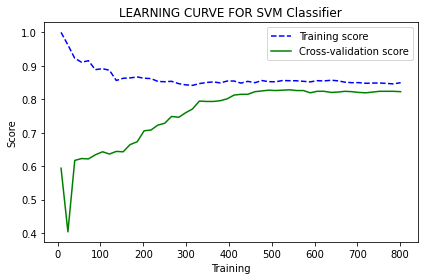

In [ ]:
#Importing Required Libraries and Modules 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import load_digits 
from sklearn.model_selection import learning_curve 

 

# Obtain scores from learning curve function 
# cv is the number of folds while performing Cross Validation 
sizes, training_scores, testing_scores = learning_curve(clfsvm.best_estimator_, Updated_X_train, Y_train, cv=10, train_sizes=np.linspace(0.01, 1.0, 50)) 

# Mean and Standard Deviation of training scores 
mean_training = np.mean(training_scores, axis=1) 
Standard_Deviation_training = np.std(training_scores, axis=1) 

# Mean and Standard Deviation of testing scores 
mean_testing = np.mean(testing_scores, axis=1) 
Standard_Deviation_testing = np.std(testing_scores, axis=1) 

# dotted blue line is for training scores and green line is for cross-validation score 
plt.plot(sizes, mean_training, '--', color="b", label="Training score") 
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score") 

# Drawing plot 
plt.title("LEARNING CURVE FOR SVM Classifier") 
plt.xlabel("Training"), plt.ylabel("Score"), plt.legend(loc="best") 
plt.tight_layout() 
plt.show()


ExtraTreesClassifier

In [ ]:
#Importing Required Libraries and Modules 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import load_digits 
from sklearn.model_selection import learning_curve 

 

# Obtain scores from learning curve function 
# cv is the number of folds while performing Cross Validation 
sizes, training_scores, testing_scores = learning_curve(etc.best_estimator_, Updated_X_train, Y_train, cv=10, train_sizes=np.linspace(0.01, 1.0, 50)) 

# Mean and Standard Deviation of training scores 
mean_training = np.mean(training_scores, axis=1) 
Standard_Deviation_training = np.std(training_scores, axis=1) 

# Mean and Standard Deviation of testing scores 
mean_testing = np.mean(testing_scores, axis=1) 
Standard_Deviation_testing = np.std(testing_scores, axis=1) 

# dotted blue line is for training scores and green line is for cross-validation score 
plt.plot(sizes, mean_training, '--', color="b", label="Training score") 
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score") 

# Drawing plot 
plt.title("LEARNING CURVE FOR ETC Classifier") 
plt.xlabel("Training"), plt.ylabel("Score"), plt.legend(loc="best") 
plt.tight_layout() 
plt.show()

AttributeError: ignored

### 5) i) Use VotingClassifier of sklearn to create an ensemble learner that utilizes the top 3 estimators you found above. Set the voting parameter to 'soft'. Use cross_val_score to calculate its score and print out its mean and std values. The following page might be useful:

Kaggl Titanic: A Machine Learning from Disaster | Modelling Part 2: 
https://www.codementor.io/@innat_2k14/kaggl-titanic-a-machine-learning-from-disaster-modelling-part-2-10gfjtm0p3


In [ ]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier VotingClassifier
from sklearn.svm import SVC
VotingPredictor = VotingClassifier(estimators =
                           [('rfc', RFC_best), 
                            ('svm', SVM_best),
                            ('etc', ETC_best)],
                           voting='soft')


VotingPredictor = VotingPredictor.fit(Updated_X_train, Y_train)

scores = cross_val_score(VotingPredictor, Updated_X_train, Y_train, cv = K_fold,
                        scoring = 'accuracy')

print(scores)
print(round(np.mean(scores)*100, 2))

### 5) j) Use the VotingClassifier you created above to predict 'Survived' for the X_test.

### 5) k) Prepare a csv file to submit to kaggle.com. Submit it and then put your results here.

### 5) l) Think of what you can do extra to improve your results.

### 5) m) (Bonus) Apply those idea(s) and then make another submission. Put your results here.

## 6) Run all of your code and get your output

## 7) Print the latest status of your notebook to a pdf file 
- The pdf file must include the link of your jupyter notebook page (see step 2 above)

## 8) Submit the PDF file on Canvas

In [ ]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Project_Titanic_Part_2_AlexisDowning.ipynb')

File ‘colab_pdf.py’ already there; not retrieving.

Hit:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:4 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Get:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Fetched 252 kB in 2s (133 kB/s)
Reading package 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'